In [1]:
import math
import matplotlib.pyplot as plt

import Objects
import numpy_utils

gain_matrix = [[-1, 0, 0], [0, 2, 0], [0, 0, 0.5]]
MIMO_charger = Objects.Proportional_object(gain=gain_matrix, sampling_time=0.1)

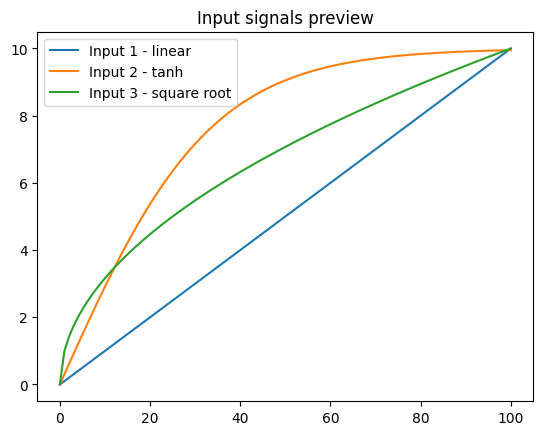

In [2]:
t0 = 0
t_max = 100

t  = []
u1 = []
u2 = []
u3 = []

for tt in range(t0, t_max+1):
    u1.append(tt*0.1)
    u2.append(10*math.tanh(0.03*tt))
    u3.append(tt**0.5)
    t.append(tt)
    
plt.title('Input signals preview')
plt.plot(t, u1, label='Input 1 - linear')
plt.plot(t, u2, label='Input 2 - tanh')
plt.plot(t, u3, label='Input 3 - square root')
plt.legend()

In [3]:
from numpy_utils import converters
conv = converters.to_array_converter()

MIMO_charger.reset_history()

u_series = []
for tt in t:
    u_vec = conv.convert_any_type([u1[tt], u2[tt], u3[tt]], vec_type='vertical')
    u_series.append(u_vec)

for input_vector in u_series:
    MIMO_charger.simulate_step(input_vector)

In [4]:
t = MIMO_charger.get_timestamps()

u = MIMO_charger.get_input_hist()
u1 = [ut[0][0] for ut in u]
u2 = [ut[1][0] for ut in u]
u3 = [ut[2][0] for ut in u]

y = MIMO_charger.get_output_hist()
y1 = [yt[0][0] for yt in y]
y2 = [yt[1][0] for yt in y]
y3 = [yt[2][0] for yt in y]

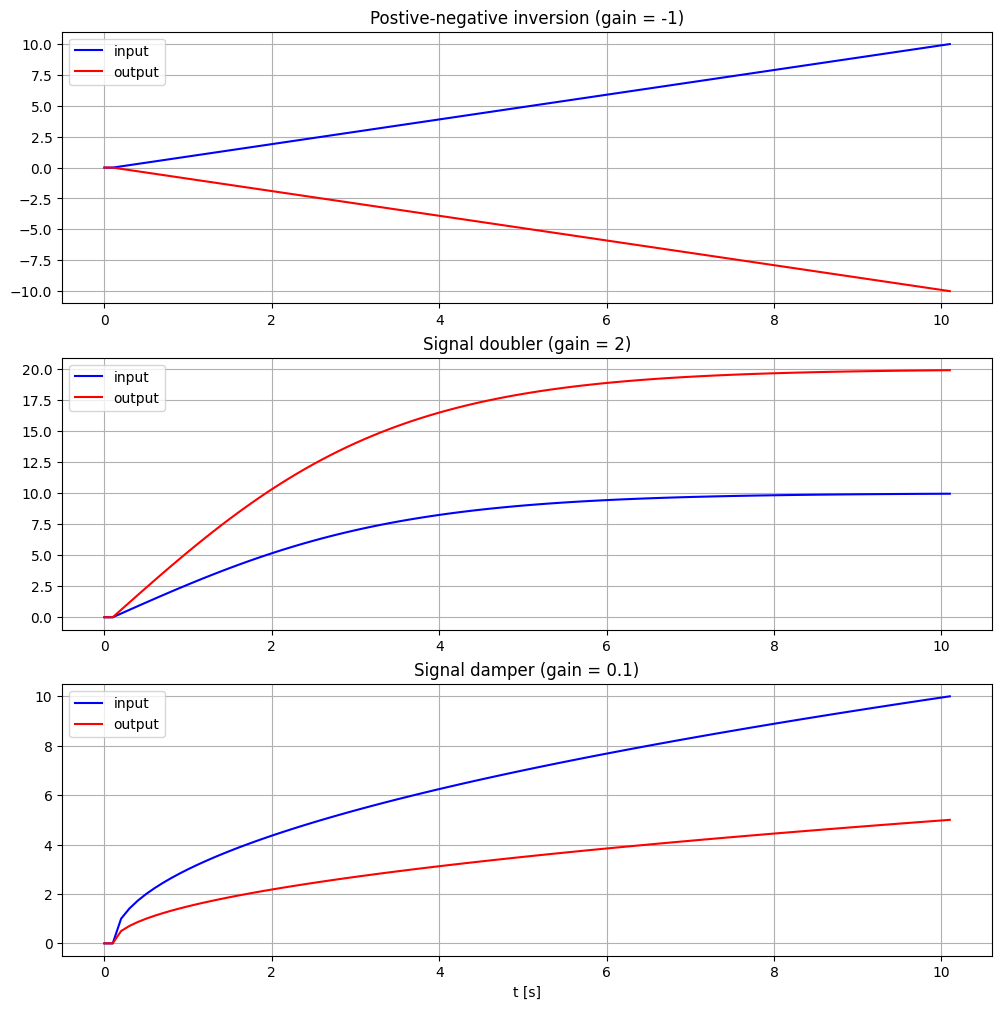

In [5]:
fig, axes = plt.subplots(3, 1, figsize=(12, 12))
ax1, ax2, ax3 = axes

plots_titles = {
    1 : 'Postive-negative inversion (gain = -1)',
    2 : 'Signal doubler (gain = 2)',
    3 : 'Signal damper (gain = 0.1)'
}

for serie in range(1, 4):
    eval(f'ax{serie}.plot(t, u{serie}, color="blue", label="input")')
    eval(f'ax{serie}.plot(t, y{serie}, color="red", label="output")')
    eval(f"ax{serie}.set_title('{plots_titles[serie]}')")
    eval(f"ax{serie}.legend()")
    eval(f"ax{serie}.grid()")

sink = ax3.set_xlabel("t [s]")